In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
import warnings
warnings.filterwarnings('ignore')

In [81]:
#loading the csv files
df=pd.read_csv('Auto_Insurance_Claims_amount.csv',na_values='?')

In [82]:
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [83]:
df.shape

(9134, 26)

In [84]:
df.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [85]:
df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [86]:
df['Country'].value_counts()

US    9134
Name: Country, dtype: int64

In [87]:
df['State Code'].unique()

array(['KS', 'NE', 'OK', 'MO', 'IA'], dtype=object)

In [88]:
df['Coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [89]:
df['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [90]:
df['EmploymentStatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

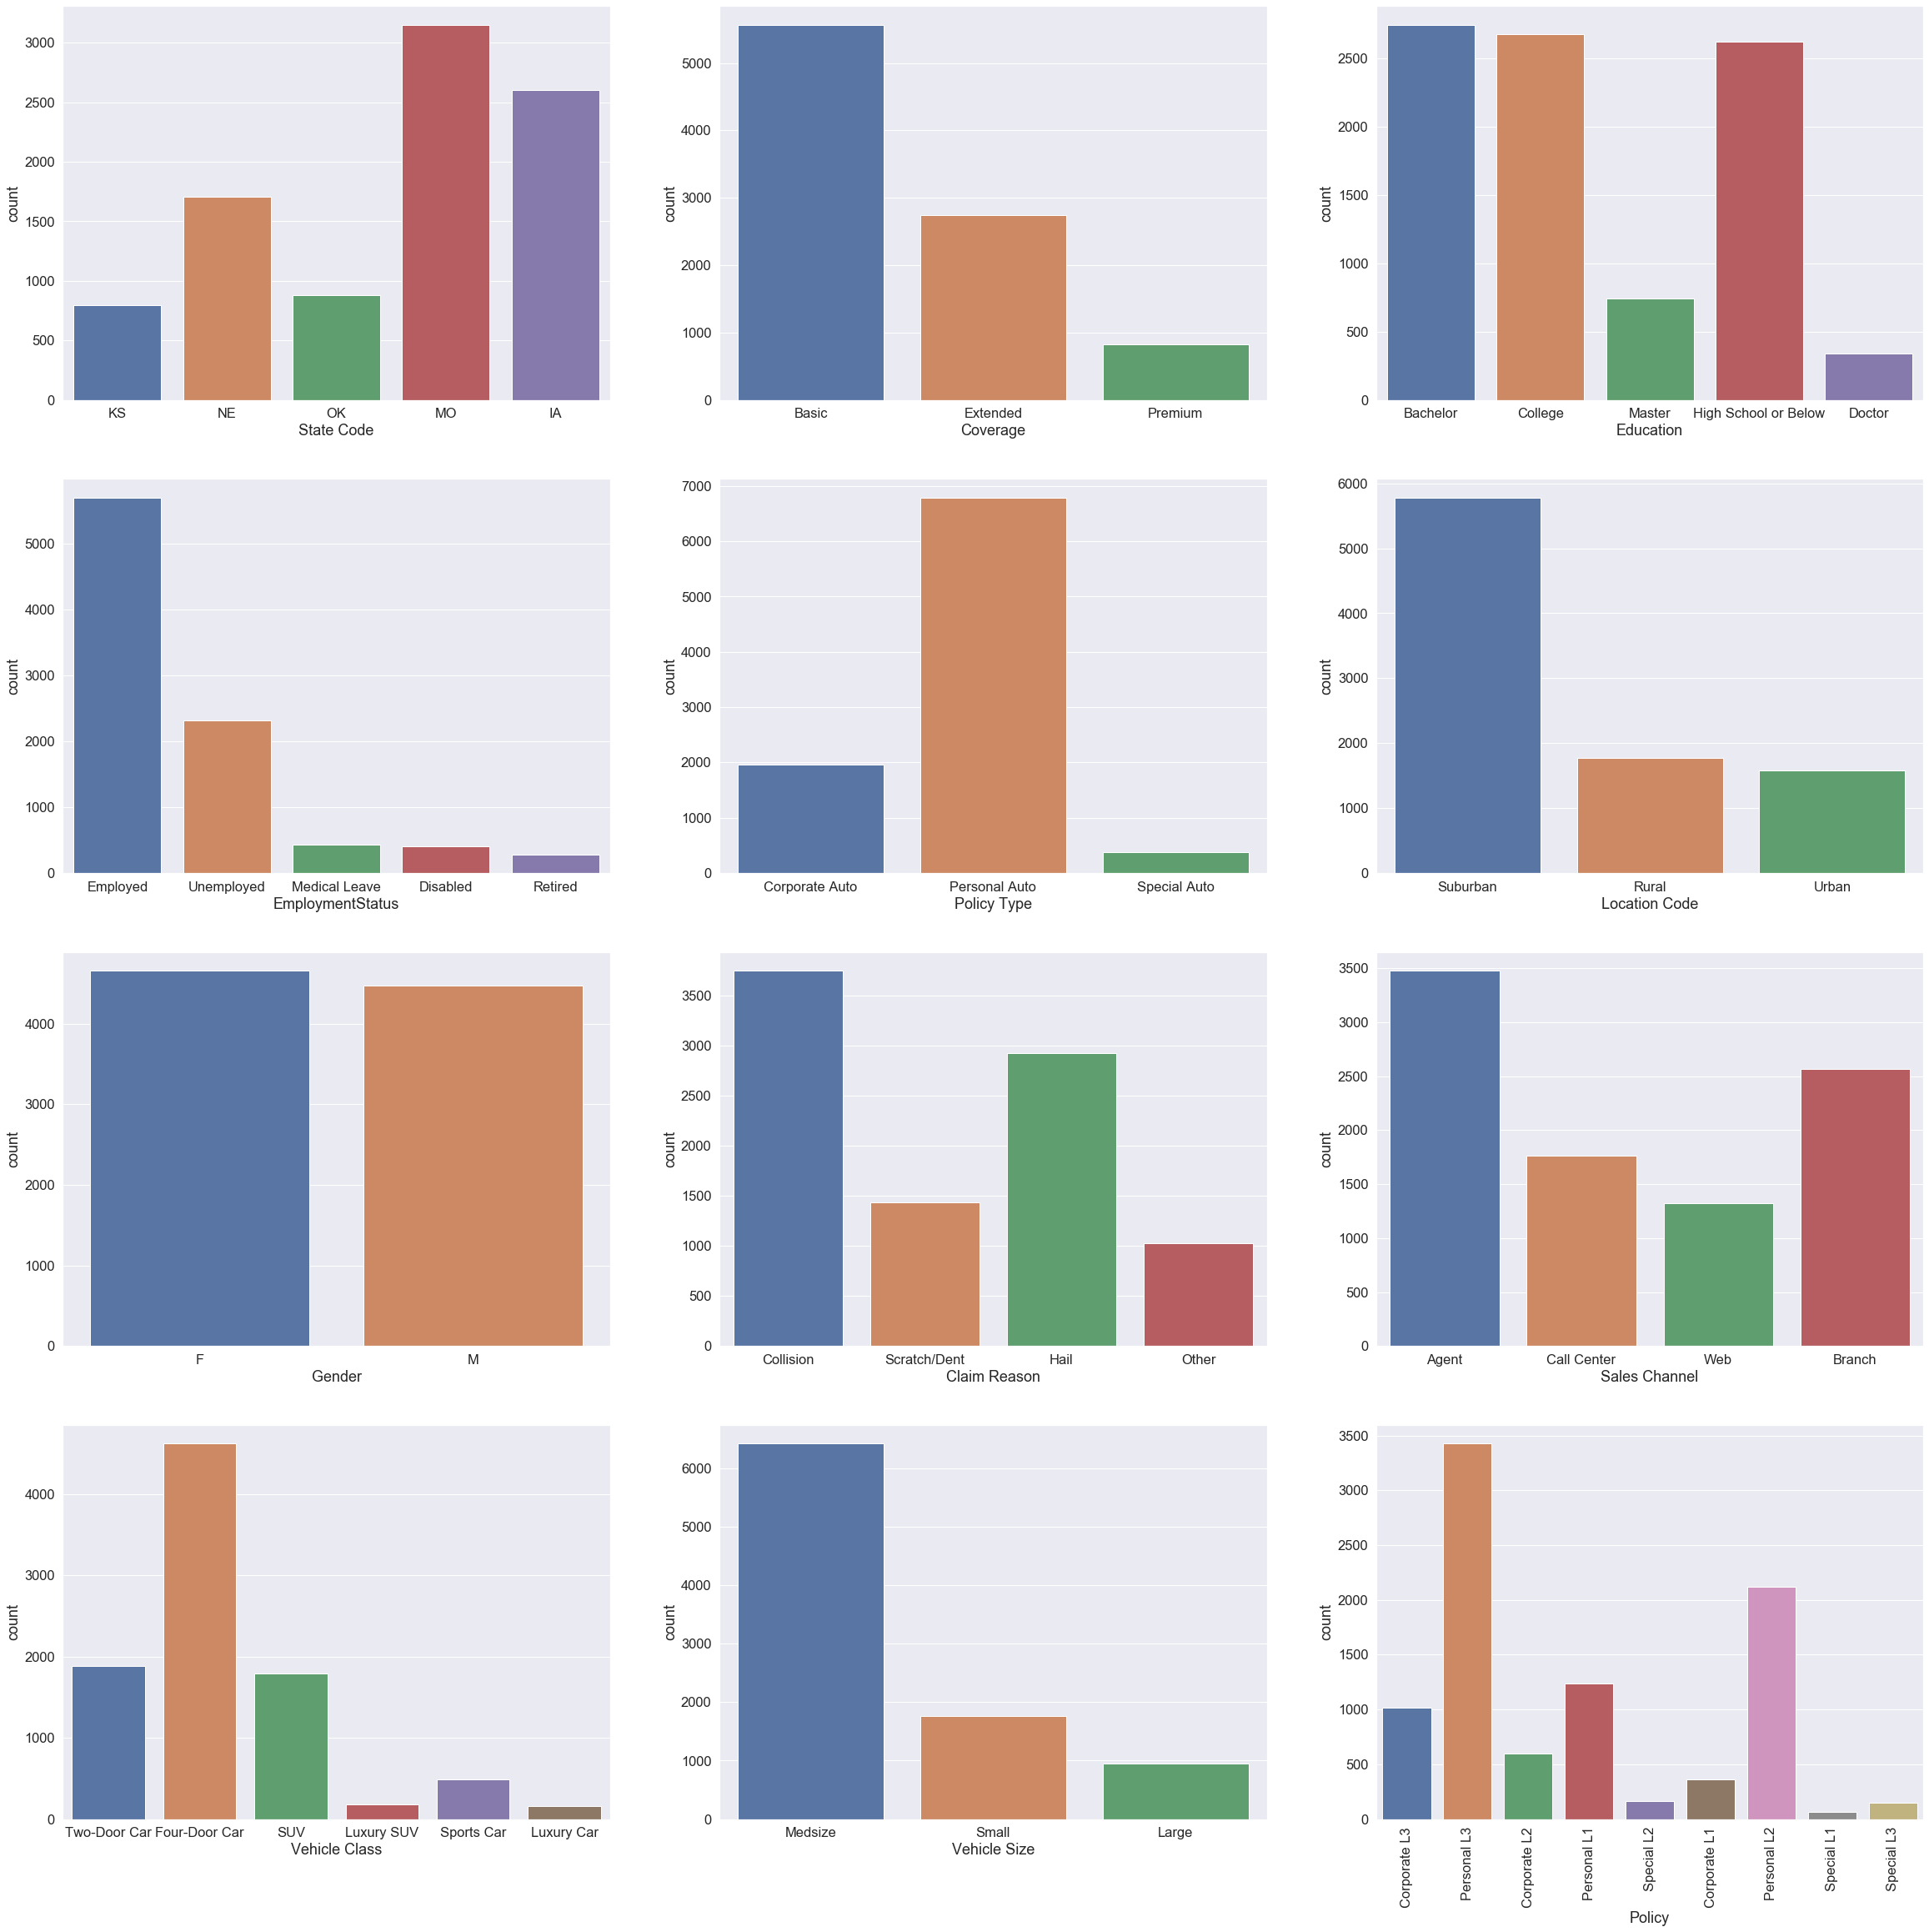

In [91]:
sns.set(font_scale=1.5)
fig,axes=plt.subplots(nrows=4,ncols=3)
fig.set_size_inches(40,40)
sns.countplot(x='State Code',data=df,ax=axes[0][0])
sns.countplot(x='Coverage',data=df,ax=axes[0][1])
sns.countplot(x='Education',data=df,ax=axes[0][2])
sns.countplot(x='EmploymentStatus',data=df,ax=axes[1][0])
sns.countplot(x='Policy Type',data=df,ax=axes[1][1])
sns.countplot(x='Location Code',data=df,ax=axes[1][2])
sns.countplot(x='Gender',data=df,ax=axes[2][0])
sns.countplot(x='Claim Reason',data=df,ax=axes[2][1])
sns.countplot(x='Sales Channel',data=df,ax=axes[2][2])
sns.countplot(x='Vehicle Class',data=df,ax=axes[3][0])
sns.countplot(x='Vehicle Size',data=df,ax=axes[3][1])
sns.countplot(x='Policy',data=df,ax=axes[3][2])
plt.xticks(rotation=90)
plt.show()



(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

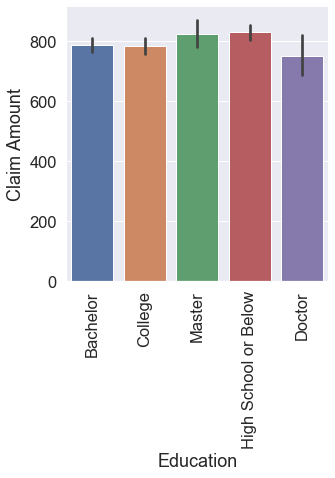

In [92]:
sns.catplot(x='Education',y='Claim Amount',data=df,kind='bar')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

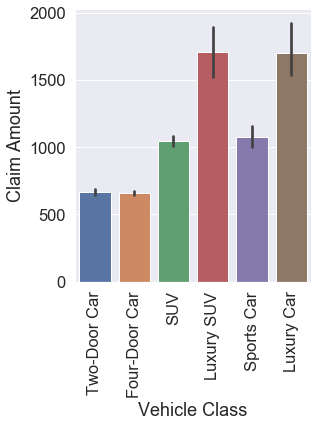

In [93]:
sns.catplot(x='Vehicle Class',y='Claim Amount',data=df,kind='bar')
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

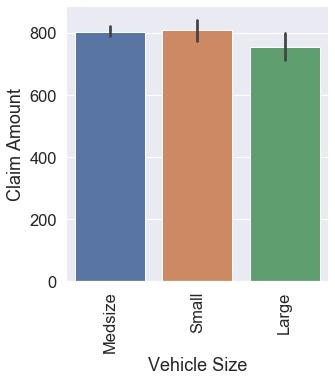

In [94]:
sns.catplot(x='Vehicle Size',y='Claim Amount',data=df,kind='bar')
plt.xticks(rotation=90)

In [95]:
df['Vehicle Size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

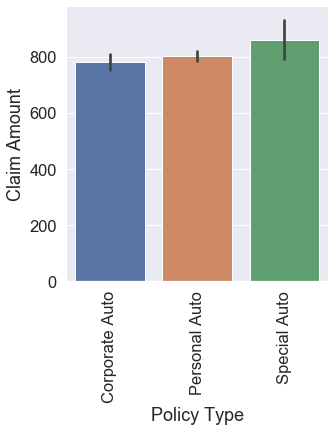

In [96]:
sns.catplot(x='Policy Type',y='Claim Amount',data=df,kind='bar')
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

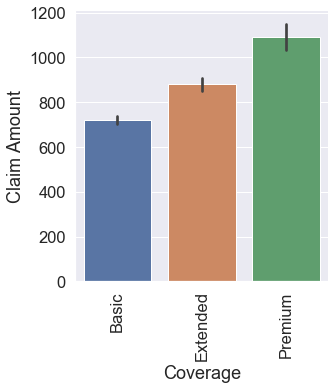

In [97]:
sns.catplot(x='Coverage',y='Claim Amount',data=df,kind='bar')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

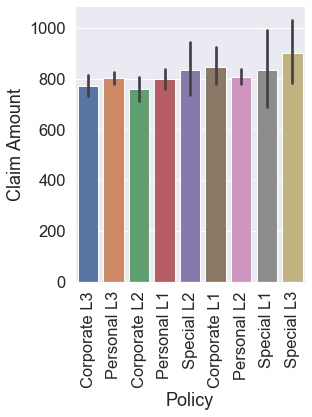

In [98]:
sns.catplot(x='Policy',y='Claim Amount',data=df,kind='bar')
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

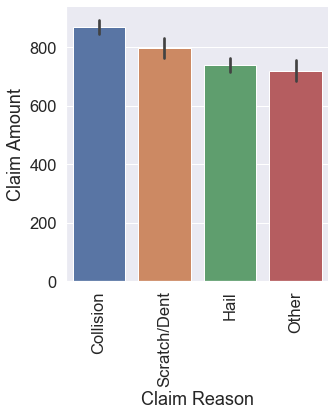

In [99]:
sns.catplot(x='Claim Reason',y='Claim Amount',data=df,kind='bar')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

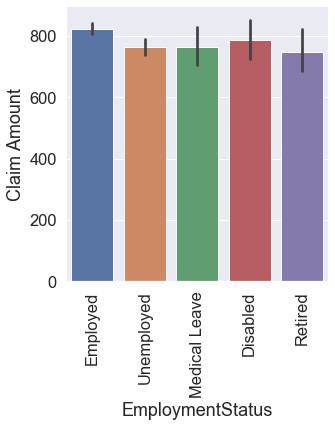

In [100]:
sns.catplot(x='EmploymentStatus',y='Claim Amount',data=df,kind='bar')
plt.xticks(rotation=90)

In [101]:
#Since State and state code are correlated .Hence dropping the State Variable
#Dropping the Country variable as there is only one country
#Dropping the Customer variable as it will not impact the claim amount




In [102]:
df.drop(['State','Country'],axis=1,inplace=True)

In [103]:
df.head()

,Customer,State Code,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,KS,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,NE,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,OK,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,MO,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,KS,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [104]:
df['Month']=pd.DatetimeIndex(df['Effective To Date']).month
df['Year']=pd.DatetimeIndex(df['Effective To Date']).year


In [105]:
df.drop(['Effective To Date'],axis=1,inplace=True)

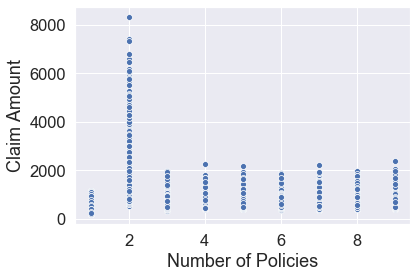

In [106]:
sns.scatterplot(x='Number of Policies',y='Claim Amount',data=df)

In [107]:
df.columns

Index(['Customer', 'State Code', 'Claim Amount', 'Response', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Month', 'Year'],
      dtype='object')

In [108]:
df=pd.get_dummies(df,columns=['Response','Policy','Year','Education','Vehicle Size','Month','State Code','Gender','Coverage','EmploymentStatus','Location Code','Marital Status','Policy Type','Claim Reason','Vehicle Class','Sales Channel'],drop_first=True)

In [109]:
#Dropping the Income and customer variable
df.drop(['Income'],axis=1,inplace=True)

In [110]:
df.drop(['Customer'],axis=1,inplace=True)

In [111]:
df.head()
pd.set_option('display.max_columns', 60)


In [112]:
df.head()

,Claim Amount,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Response_Yes,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Education_College,Education_Doctor,Education_High School or Below,Education_Master,Vehicle Size_Medsize,Vehicle Size_Small,Month_2,State Code_KS,State Code_MO,State Code_NE,State Code_OK,Gender_M,Coverage_Extended,Coverage_Premium,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Claim Reason_Hail,Claim Reason_Other,Claim Reason_Scratch/Dent,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web
0,276.351928,69,32,5,0,1,384.811147,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,697.953590,94,13,42,0,8,1131.464935,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
2,1288.743165,108,18,38,0,2,566.472247,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,764.586183,106,18,65,0,7,529.881344,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,281.369258,73,12,44,0,1,138.130879,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df=sc.fit_transform(df)

In [114]:
df=pd.DataFrame(data=df)

In [115]:
x=df.iloc[:,1:]
x.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640,-0.408822,-0.263970,2.829821,-0.396335,-0.550113,-0.774732,-0.085313,-0.135215,-0.128336,-0.644566,-0.197228,-0.63454,-0.297133,0.649504,-0.489233,1.075304,3.232045,-0.725537,-0.478722,-0.326930,-0.980269,-0.654961,-0.314893,0.776543,-0.222809,-0.178486,-0.582997,0.761938,-0.457691,0.850909,-0.608302,-1.701010,-0.207775,-0.686533,-0.355336,-0.431191,-0.134795,-0.143383,-0.494726,-0.236545,1.960371,-0.625215,-0.489405,-0.411917
1,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737,-0.408822,-0.263970,-0.353379,-0.396335,-0.550113,1.290768,-0.085313,-0.135215,-0.128336,-0.644566,-0.197228,-0.63454,-0.297133,0.649504,-0.489233,-0.929969,-0.309402,-0.725537,2.088894,-0.326930,-0.980269,1.526809,-0.314893,-1.287759,-0.222809,-0.178486,1.715274,0.761938,-0.457691,-1.175213,1.643920,0.587886,-0.207775,-0.686533,-0.355336,2.319158,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108,-0.625215,-0.489405,-0.411917
2,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734,-0.408822,-0.263970,-0.353379,-0.396335,-0.550113,1.290768,-0.085313,-0.135215,-0.128336,-0.644566,-0.197228,-0.63454,-0.297133,0.649504,-0.489233,1.075304,-0.309402,-0.725537,-0.478722,3.058759,-0.980269,-0.654961,3.175681,0.776543,-0.222809,-0.178486,-0.582997,0.761938,-0.457691,0.850909,-0.608302,0.587886,-0.207775,-0.686533,-0.355336,-0.431191,-0.134795,-0.143383,-0.494726,-0.236545,1.960371,-0.625215,-0.489405,-0.411917
3,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769,-0.408822,3.788306,-0.353379,-0.396335,-0.550113,-0.774732,-0.085313,-0.135215,-0.128336,-0.644566,-0.197228,-0.63454,-0.297133,0.649504,-0.489233,-0.929969,-0.309402,1.378290,-0.478722,-0.326930,1.020128,-0.654961,-0.314893,-1.287759,-0.222809,-0.178486,1.715274,0.761938,-0.457691,0.850909,-0.608302,-1.701010,-0.207775,-0.686533,-0.355336,-0.431191,-0.134795,-0.143383,2.021323,-0.236545,-0.510108,-0.625215,2.043299,-0.411917
4,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843,-0.408822,-0.263970,-0.353379,2.523119,-0.550113,-0.774732,-0.085313,-0.135215,-0.128336,-0.644566,-0.197228,-0.63454,-0.297133,0.649504,-0.489233,1.075304,3.232045,-0.725537,-0.478722,-0.326930,1.020128,-0.654961,-0.314893,0.776543,-0.222809,-0.178486,-0.582997,-1.312442,-0.457691,-1.175213,1.643920,0.587886,-0.207775,-0.686533,-0.355336,-0.431191,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108,-0.625215,-0.489405,-0.411917


In [116]:
y=df.iloc[:,0:1]
y.head()

,0
0,-0.762878
1,-0.149245
2,0.710636
3,-0.052263
4,-0.755575


In [117]:
max_rscore=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r_scr=r2_score(y_test,pred)
    print("R2_score corresponding to random state:",r_state,"is:",r_scr)
    if r_scr>max_rscore:
        max_rscore=r_scr
        final_r_state=r_state
print()
print("max accuracy score corresponding to r_state is",final_r_state,"is:",max_rscore)

R2_score corresponding to random state: 42 is: 0.15454681799265835
R2_score corresponding to random state: 43 is: 0.13706295733281226
R2_score corresponding to random state: 44 is: 0.1442965317697018
R2_score corresponding to random state: 45 is: 0.1528821634537737
R2_score corresponding to random state: 46 is: 0.16378120129082196
R2_score corresponding to random state: 47 is: 0.17544167806671718
R2_score corresponding to random state: 48 is: 0.17089085693535078
R2_score corresponding to random state: 49 is: 0.1430137740726657
R2_score corresponding to random state: 50 is: 0.16881950162358295
R2_score corresponding to random state: 51 is: 0.14592937123110294
R2_score corresponding to random state: 52 is: 0.15009368244457955
R2_score corresponding to random state: 53 is: 0.15816930443871335
R2_score corresponding to random state: 54 is: 0.15093699098840296
R2_score corresponding to random state: 55 is: 0.16695797675220392
R2_score corresponding to random state: 56 is: 0.1436218291415650

In [144]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
model_new = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
model_new.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model_new.predict(x)
    score = model_new.score(x, y)    
    r2_scr=r2_score(y,pred)
    print("The score is:",score)
    print("The r2 Score is:",r2_scr)
        

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.845059793228999
The r2 Score is: 0.845059793228999
The score is: 0.6909018640408258
The r2 Score is: 0.6909018640408258


In [146]:
from sklearn.ensemble import RandomForestRegressor
model_new=RandomForestRegressor()
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5,10, 15, 20, 25, None],    
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [25, 50, 100, 200]}

grid1_search = GridSearchCV(model_new, params)

In [147]:
grid1_search.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15, 2

In [148]:
grid1_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [149]:
from sklearn.metrics import r2_score
model_new = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
model_new.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model_new.predict(x)
    score = model_new.score(x, y)    
    r2_scr=r2_score(y,pred)
    print("The score is:",score)
    print("The r2 Score is:",r2_scr)
        

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.9331252817333062
The r2 Score is: 0.9331252817333062
The score is: 0.7051884466991856
The r2 Score is: 0.7051884466991856


In [150]:
from sklearn.svm import SVR
model=SVR(kernel='rbf')
from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(model, param_grid, cv=3)

In [151]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [152]:
grid_search.best_estimator_

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [153]:
model = SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

model.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)
    score = model.score(x, y)    
    r2_scr=r2_score(y,pred)
    print("The score is:",score)
    print("The r2 Score is:",r2_scr)
      

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.19697483590270978
The r2 Score is: 0.1969748359027098
The score is: 0.10504943851028614
The r2 Score is: 0.10504943851028614


In [242]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
r2=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    r2_scr=r2_score(y_test,test_pred)
    r2.append(r2_scr)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle,'R2 score':r2}   
d

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.21014094018127602,
  0.3500195059870013,
  0.2071406717963751,
  0.6584949473383722,
  0.6727653475304175],
 'R2 score': [0.6830411237226561,
  0.5503545044957261,
  0.6852539318654393,
  -0.1048431134299701,
  0.016737230495992517]}

In [ ]:
#further check and found that the random forest regressor is giving the best results

In [ ]:
from sklearn.externals import joblib
joblib.dump(dtc,'auto-ins-claim_regression.pkl')